# Kuramoto Model

In this notebook, we will simulate the Kuramoto model. The Kuramoto model is defined by the following differential equation:
$$ \frac{d \theta_i}{dt} = \omega_i + \zeta_i + \frac{K}{N} \sum_{j=1}^N A_{ij} sin(\theta_j(t - \tau_{ij}) - \theta_i(t)) + h_i(t)$$
here $\theta_i$ is the phase of oscillator $i$, $\omega_i$ is the natural frequency of oscillator $i$, $\zeta_i$ is the noise term, $K$ is the global coupling strength, $A$ is the coupling matrix, $\tau_{ij}$ is the phase lag between oscillator $i$ and $j$, and $h_i(t)$ is the external input to oscillator $i$.


The Kuramoto model describes synchronization between oscillators. Nodes in the network are influenced not only by their own natural frequency but also by the other nodes in the network. The strength of this influence is determined by the global coupling and the connectivity matrix. The degree of synchronization depends on the strength of the coupling. The Kuramoto model is relatively simple, mathematically tractable, and easy to understand. Kuramoto model firstly described in 1975 by Yoshiki Kuramoto (Y. Kuramoto. *Self-entrainment of a population of coupled non-linear
oscillators*. in International Symposium on Mathematical Problems in
Theoretical Physics, H. Araki, Ed. Berlin, Heidelberg: Springer Berlin
Heidelberg, 1975, pp. 420–422).


In [1]:
# change to the root directory of the project
import os
if os.getcwd().split("/")[-1] == "examples":
    os.chdir('..')

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2    

In [2]:
try:
    import matplotlib.pyplot as plt
except ImportError:
    import sys
    !{sys.executable} -m pip install matplotlib
    import matplotlib.pyplot as plt
    
import numpy as np

# Let's import the Kuramoto model
from neurolib.models.kuramoto import KuramotoModel

# Some useful functions are provided here
import neurolib.utils.functions as func

# Single node simulation 

Here we will simulate a signal node with no noise. We then cap the phase values to be between 0 and 2*pi. We also willo plot the phase values over time.

In [3]:
model = KuramotoModel()
model.params['duration'] = 10
model.run()

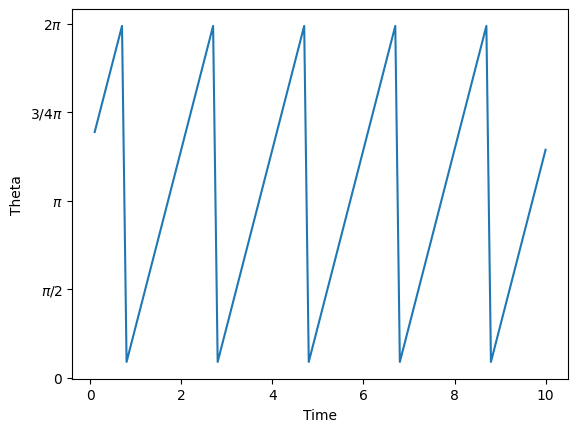

In [4]:
theta = model['theta'].T
theta_capped = np.mod(theta, 2*np.pi) # cap theta to [0, 2*pi]

plt.plot(model.t, theta_capped)
plt.xlabel("Time")
plt.ylabel("Theta")
plt.yticks(np.arange(0, 2*np.pi+0.1, np.pi/2), [ r"$0$", r"$\pi/2$", r"$\pi$", r"$3/4\pi$", r"$2\pi$",])# modify y-axis ticks to be in multiples of pi
plt.show()

# Network simulation

Here we simulate networks of oscillators. We will simulate a network of 8 oscillators with a global coupling strength 0.3. Here we initialize a connectivity matrix with all-to-all connectivity. We then simulate the network for 30 miliseconds assuming dt is in ms. We will also plot the phase values over time.

In [5]:
# setting parameters
N = 8
cmat = np.ones((N, N)) # fully connected network
dmat = np.zeros((N,N))

network_model = KuramotoModel(Cmat=cmat, Dmat=dmat)
network_model.params['duration'] = 0.03*1000
network_model.params['k']=0.3
network_model.run()

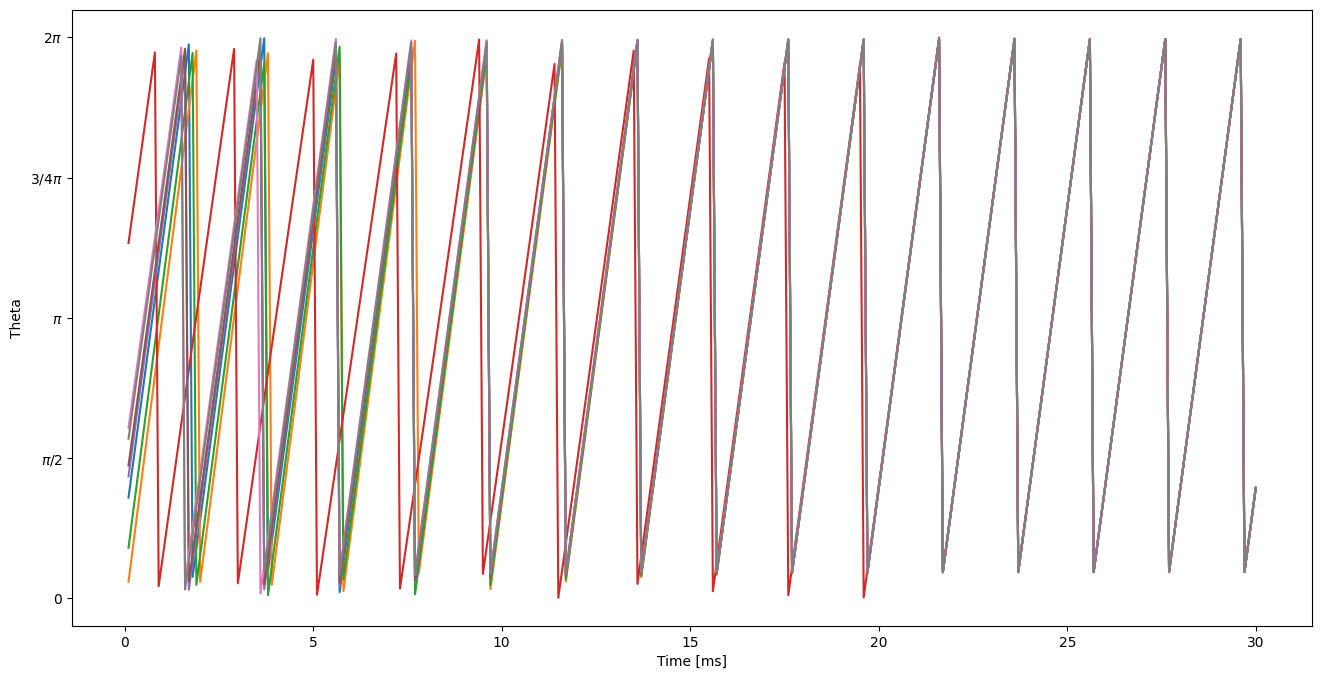

In [6]:
theta = network_model['theta'].T
# cap the phase to be between 0 and 2pi
theta_capped = np.mod(theta, 2*np.pi)

# set up the figure
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

plt.plot(network_model.t, theta_capped)
plt.xlabel("Time [ms]")
plt.ylabel("Theta")
plt.yticks(np.arange(0, 2*np.pi+0.1, np.pi/2), [ r"$0$", r"$\pi/2$", r"$\pi$", r"$3/4\pi$", r"$2\pi$",])# modify y-axis ticks to be in multiples of pi
plt.show()

We can see that there is synchronization between nodes after around 25 ms. This happened because the nodes do not really have strong connection with each others. Now we will try to increase global coupling to 1 to see if synchronization comes faster.

In [7]:
network_model.params['k']=1
network_model.run()

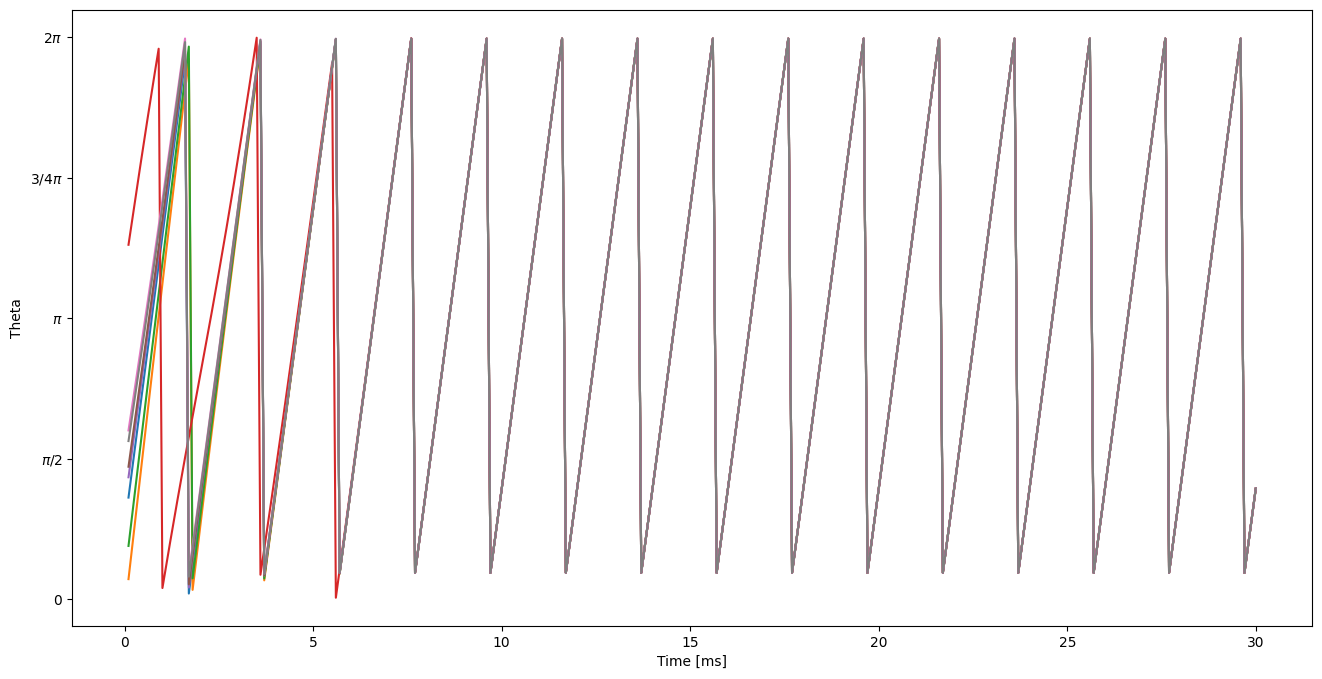

In [8]:
theta = network_model['theta'].T
# cap the phase to be between 0 and 2pi
theta_capped = np.mod(theta, 2*np.pi)

# set up the figure
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

plt.plot(network_model.t, theta_capped)
plt.xlabel("Time [ms]")
plt.ylabel("Theta")
plt.yticks(np.arange(0, 2*np.pi+0.1, np.pi/2), [ r"$0$", r"$\pi/2$", r"$\pi$", r"$3/4\pi$", r"$2\pi$",])# modify y-axis ticks to be in multiples of pi
plt.show()

Now the syncrhonization happens after 7 ms which is faster compared to the previous simulation.